<a href="https://colab.research.google.com/github/pranay8297/deep-learning-projects/blob/master/camvid_tiny_practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from fastai.vision import *

In [2]:
path = untar_data(URLs.CAMVID_TINY)
path.ls()

[PosixPath('/root/.fastai/data/camvid_tiny/labels'),
 PosixPath('/root/.fastai/data/camvid_tiny/codes.txt'),
 PosixPath('/root/.fastai/data/camvid_tiny/images')]

In [0]:
path_img = path/'images'
path_lbl= path/'labels'

In [4]:
path_img.ls()[:3], path_lbl.ls()[:3]

([PosixPath('/root/.fastai/data/camvid_tiny/images/Seq05VD_f04530.png'),
  PosixPath('/root/.fastai/data/camvid_tiny/images/0016E5_05730.png'),
  PosixPath('/root/.fastai/data/camvid_tiny/images/0016E5_08400.png')],
 [PosixPath('/root/.fastai/data/camvid_tiny/labels/0001TP_007500_P.png'),
  PosixPath('/root/.fastai/data/camvid_tiny/labels/0006R0_f02610_P.png'),
  PosixPath('/root/.fastai/data/camvid_tiny/labels/Seq05VD_f03090_P.png')])

In [0]:
codes = np.loadtxt(path/'codes.txt', dtype=str)

In [6]:
codes

array(['Animal', 'Archway', 'Bicyclist', 'Bridge', 'Building', 'Car', 'CartLuggagePram', 'Child', 'Column_Pole',
       'Fence', 'LaneMkgsDriv', 'LaneMkgsNonDriv', 'Misc_Text', 'MotorcycleScooter', 'OtherMoving', 'ParkingBlock',
       'Pedestrian', 'Road', 'RoadShoulder', 'Sidewalk', 'SignSymbol', 'Sky', 'SUVPickupTruck', 'TrafficCone',
       'TrafficLight', 'Train', 'Tree', 'Truck_Bus', 'Tunnel', 'VegetationMisc', 'Void', 'Wall'], dtype='<U17')

In [0]:
def get_name(image_path):
  return path_lbl/'{}_P{}'.format(image_path.stem, image_path.suffix)

In [8]:
get_name(path_img.ls()[0])

PosixPath('/root/.fastai/data/camvid_tiny/labels/Seq05VD_f04530_P.png')

In [0]:
img_p = path_img.ls()[0]
mask_p= get_name(img_p)

In [10]:
img_p, mask_p

(PosixPath('/root/.fastai/data/camvid_tiny/images/Seq05VD_f04530.png'),
 PosixPath('/root/.fastai/data/camvid_tiny/labels/Seq05VD_f04530_P.png'))

In [0]:
img = open_image(img_p)
mask = open_mask(mask_p)

In [12]:
img.data.shape

torch.Size([3, 96, 128])

In [0]:
x, y = img.data, mask.data

In [15]:
x[1], y, x

(tensor([[0.1843, 0.2000, 0.2471,  ..., 1.0000, 1.0000, 1.0000],
         [0.1686, 0.2078, 0.2588,  ..., 1.0000, 1.0000, 1.0000],
         [0.1686, 0.2078, 0.2706,  ..., 1.0000, 1.0000, 1.0000],
         ...,
         [0.3137, 0.3216, 0.3255,  ..., 0.2863, 0.2745, 0.2824],
         [0.3137, 0.3137, 0.3176,  ..., 0.2902, 0.2824, 0.2745],
         [0.3059, 0.3176, 0.3216,  ..., 0.2902, 0.2941, 0.2902]]),
 tensor([[[ 4,  4,  4,  ..., 21, 21, 21],
          [ 4,  4,  4,  ..., 21, 21, 21],
          [ 4,  4,  4,  ..., 21, 21, 21],
          ...,
          [19, 19, 19,  ..., 17, 17, 17],
          [19, 19, 19,  ..., 17, 17, 17],
          [19, 19, 19,  ..., 17, 17, 17]]]),
 tensor([[[0.1843, 0.2000, 0.2353,  ..., 1.0000, 1.0000, 1.0000],
          [0.1686, 0.2039, 0.2471,  ..., 1.0000, 1.0000, 1.0000],
          [0.1725, 0.2118, 0.2549,  ..., 1.0000, 1.0000, 1.0000],
          ...,
          [0.3137, 0.3216, 0.3255,  ..., 0.2588, 0.2471, 0.2510],
          [0.3137, 0.3137, 0.3176,  ..., 0.26

In [16]:
mask.data.shape

torch.Size([1, 96, 128])

In [17]:
mask.data

tensor([[[ 4,  4,  4,  ..., 21, 21, 21],
         [ 4,  4,  4,  ..., 21, 21, 21],
         [ 4,  4,  4,  ..., 21, 21, 21],
         ...,
         [19, 19, 19,  ..., 17, 17, 17],
         [19, 19, 19,  ..., 17, 17, 17],
         [19, 19, 19,  ..., 17, 17, 17]]])

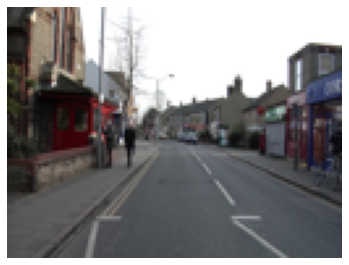

In [18]:
img.show(figsize = (6,6))

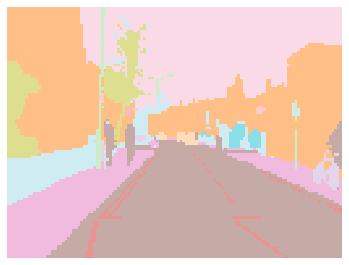

In [20]:
mask.show(figsize = (6,6))

In [0]:
train_size = img.shape[1]//2

In [0]:
src = SegmentationItemList.from_folder(path_img).split_by_rand_pct().label_from_func(get_name, classes = codes)

In [23]:
src

LabelLists;

Train: LabelList (80 items)
x: SegmentationItemList
Image (3, 96, 128),Image (3, 96, 128),Image (3, 96, 128),Image (3, 96, 128),Image (3, 96, 128)
y: SegmentationLabelList
ImageSegment (1, 96, 128),ImageSegment (1, 96, 128),ImageSegment (1, 96, 128),ImageSegment (1, 96, 128),ImageSegment (1, 96, 128)
Path: /root/.fastai/data/camvid_tiny/images;

Valid: LabelList (20 items)
x: SegmentationItemList
Image (3, 96, 128),Image (3, 96, 128),Image (3, 96, 128),Image (3, 96, 128),Image (3, 96, 128)
y: SegmentationLabelList
ImageSegment (1, 96, 128),ImageSegment (1, 96, 128),ImageSegment (1, 96, 128),ImageSegment (1, 96, 128),ImageSegment (1, 96, 128)
Path: /root/.fastai/data/camvid_tiny/images;

Test: None

In [0]:
data = src.transform(get_transforms(), tfm_y = True, size = train_size).databunch().normalize(imagenet_stats)

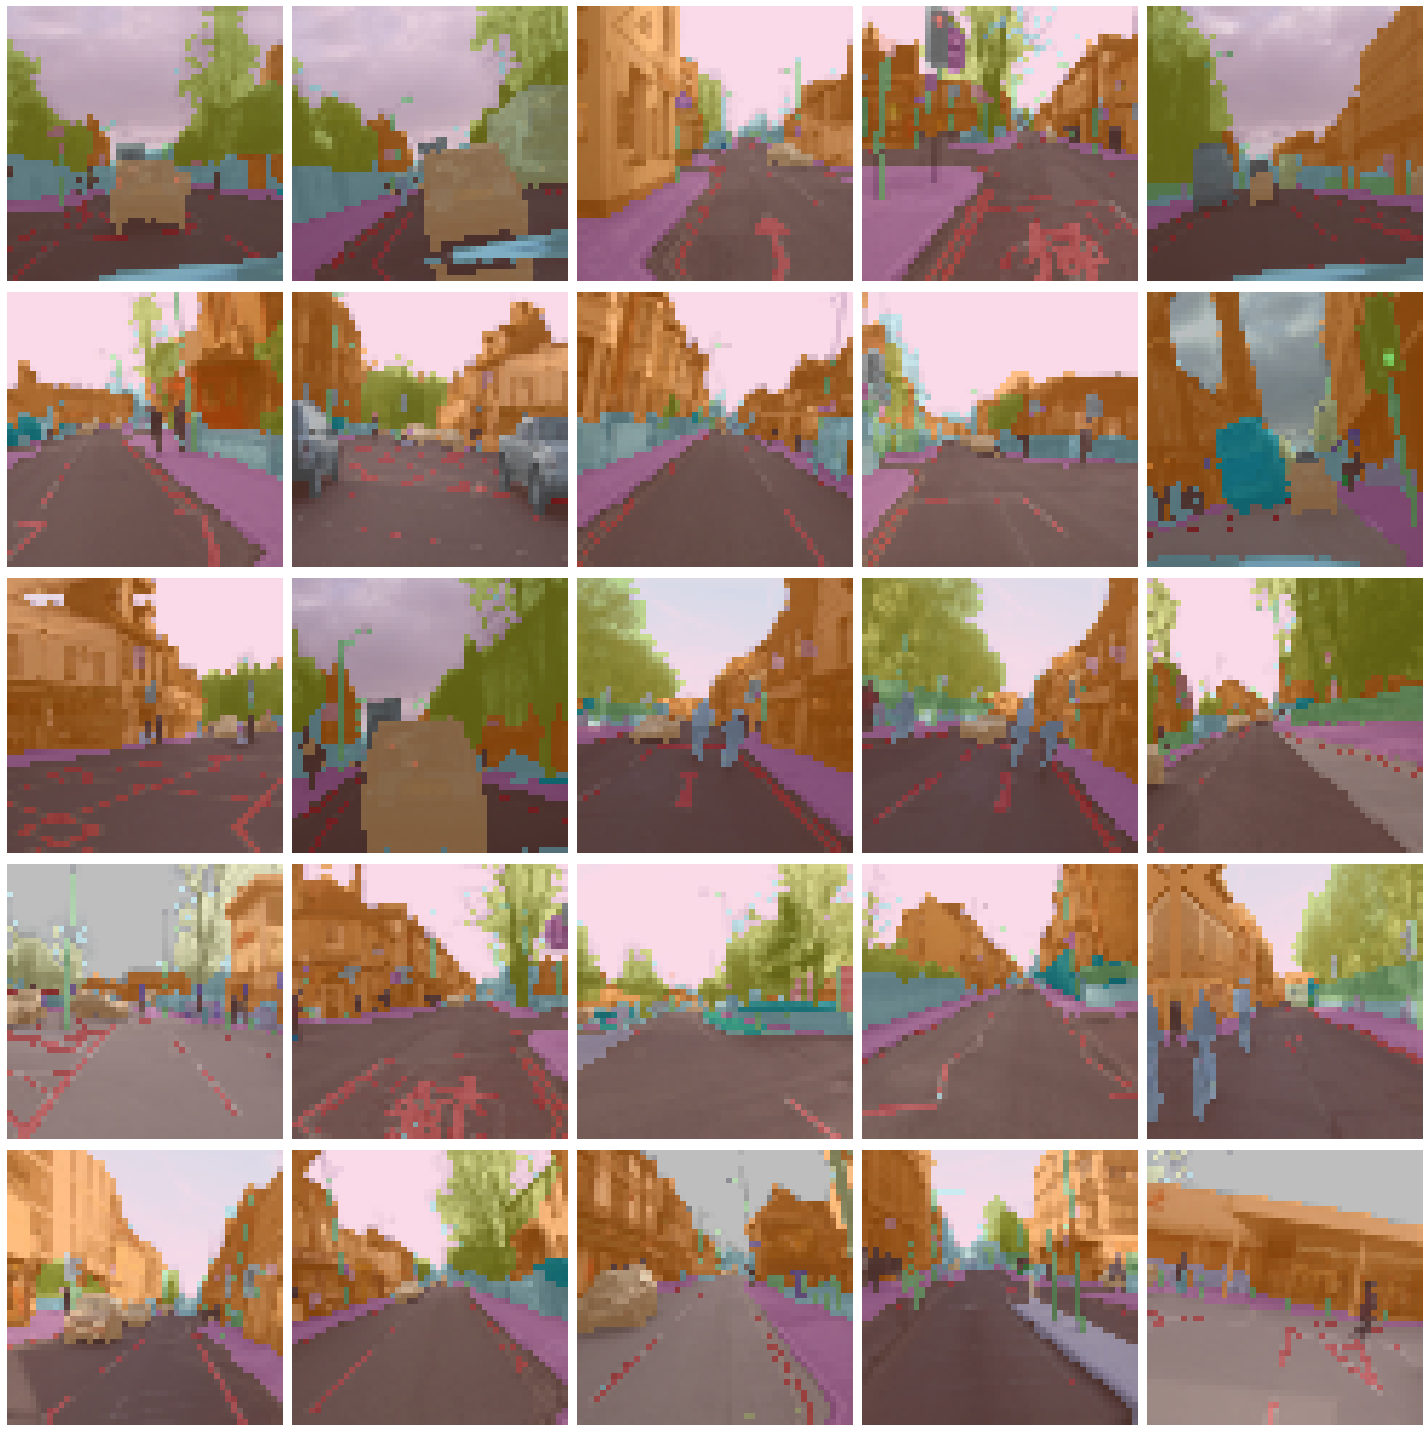

In [25]:
data.show_batch()

In [0]:
arch=models.resnet50

In [27]:
codes

array(['Animal', 'Archway', 'Bicyclist', 'Bridge', 'Building', 'Car', 'CartLuggagePram', 'Child', 'Column_Pole',
       'Fence', 'LaneMkgsDriv', 'LaneMkgsNonDriv', 'Misc_Text', 'MotorcycleScooter', 'OtherMoving', 'ParkingBlock',
       'Pedestrian', 'Road', 'RoadShoulder', 'Sidewalk', 'SignSymbol', 'Sky', 'SUVPickupTruck', 'TrafficCone',
       'TrafficLight', 'Train', 'Tree', 'Truck_Bus', 'Tunnel', 'VegetationMisc', 'Void', 'Wall'], dtype='<U17')

In [0]:
name_id = {}
for index, value in enumerate(codes):
  name_id[value] = index

In [29]:
name_id

{'Animal': 0,
 'Archway': 1,
 'Bicyclist': 2,
 'Bridge': 3,
 'Building': 4,
 'Car': 5,
 'CartLuggagePram': 6,
 'Child': 7,
 'Column_Pole': 8,
 'Fence': 9,
 'LaneMkgsDriv': 10,
 'LaneMkgsNonDriv': 11,
 'Misc_Text': 12,
 'MotorcycleScooter': 13,
 'OtherMoving': 14,
 'ParkingBlock': 15,
 'Pedestrian': 16,
 'Road': 17,
 'RoadShoulder': 18,
 'SUVPickupTruck': 22,
 'Sidewalk': 19,
 'SignSymbol': 20,
 'Sky': 21,
 'TrafficCone': 23,
 'TrafficLight': 24,
 'Train': 25,
 'Tree': 26,
 'Truck_Bus': 27,
 'Tunnel': 28,
 'VegetationMisc': 29,
 'Void': 30,
 'Wall': 31}

In [0]:
void_code = name_id['Void']

In [0]:
new_mask = mask.data.squeeze(1) != void_code

In [32]:
new_mask.squeeze(1)

tensor([[[True, True, True,  ..., True, True, True],
         [True, True, True,  ..., True, True, True],
         [True, True, True,  ..., True, True, True],
         ...,
         [True, True, True,  ..., True, True, True],
         [True, True, True,  ..., True, True, True],
         [True, True, True,  ..., True, True, True]]])

In [0]:

def acc_camvid(input, target):
    target = target.squeeze(1)
    mask = target != void_code
    return (input.argmax(dim=1)[mask]==target[mask]).float().mean()

In [0]:
learn = unet_learner(data, models.resnet34, metrics = acc_camvid)
learn.save('stage-1')

In [47]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


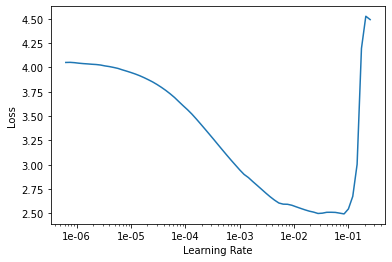

In [48]:
learn.recorder.plot()

In [55]:
learn.load('stage-1')
lrs = slice(3e-03)
learn.fit_one_cycle(10, lrs)

epoch,train_loss,valid_loss,acc_camvid,time
0,4.067886,3.200759,0.075410,00:00
1,3.711777,6.726851,0.260768,00:00
2,4.138626,3.873122,0.518549,00:00
3,4.222461,2.926412,0.215810,00:00
4,3.946764,2.689104,0.234539,00:00
5,3.695063,2.327428,0.254839,00:00
6,3.479220,1.980971,0.519919,00:00
7,3.280881,1.869409,0.544622,00:00
8,3.120043,1.822157,0.552639,00:00
9,2.995766,1.808296,0.556748,00:00


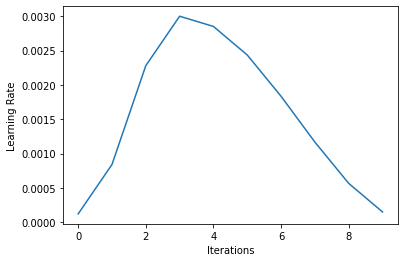

In [56]:
learn.recorder.plot_lr()

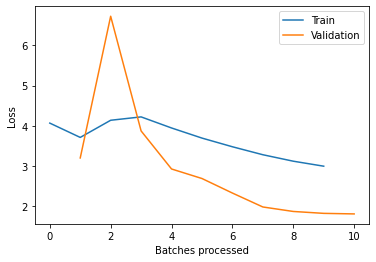

In [57]:
learn.recorder.plot_losses()

In [0]:
learn.save('stage-2')

In [59]:
learn.unfreeze()
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


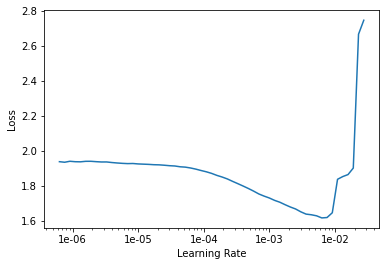

In [60]:
learn.recorder.plot()

In [0]:
learn.save('stage-3')

In [72]:
learn.load('stage-3')
lrs = slice(3e-05, 1e-03)
learn.fit_one_cycle(10, lrs)

epoch,train_loss,valid_loss,acc_camvid,time
0,1.924685,1.800515,0.560409,00:00
1,1.902571,1.783245,0.580934,00:00
2,1.866129,1.668157,0.572243,00:00
3,1.834501,1.516113,0.661195,00:00
4,1.767168,1.725258,0.558230,00:00
5,1.763542,1.456706,0.655693,00:00
6,1.709265,1.622144,0.583988,00:00
7,1.696879,1.491959,0.596766,00:00
8,1.675429,1.408007,0.610083,00:00
9,1.650085,1.384889,0.616304,00:00


In [0]:
train_size = img.shape[1]

In [0]:
learn.save('stage-4')

In [78]:
src

LabelLists;

Train: LabelList (80 items)
x: SegmentationItemList
Image (3, 48, 48),Image (3, 48, 48),Image (3, 48, 48),Image (3, 48, 48),Image (3, 48, 48)
y: SegmentationLabelList
ImageSegment (1, 48, 48),ImageSegment (1, 48, 48),ImageSegment (1, 48, 48),ImageSegment (1, 48, 48),ImageSegment (1, 48, 48)
Path: /root/.fastai/data/camvid_tiny/images;

Valid: LabelList (20 items)
x: SegmentationItemList
Image (3, 48, 48),Image (3, 48, 48),Image (3, 48, 48),Image (3, 48, 48),Image (3, 48, 48)
y: SegmentationLabelList
ImageSegment (1, 48, 48),ImageSegment (1, 48, 48),ImageSegment (1, 48, 48),ImageSegment (1, 48, 48),ImageSegment (1, 48, 48)
Path: /root/.fastai/data/camvid_tiny/images;

Test: None

In [0]:
big_data = src.transform(get_transforms(), tfm_y = True, size = train_size).databunch(bs = 8).normalize(imagenet_stats)

In [0]:
learn.data = big_data

In [81]:
learn.load('stage-4')

Learner(data=ImageDataBunch;

Train: LabelList (80 items)
x: SegmentationItemList
Image (3, 96, 96),Image (3, 96, 96),Image (3, 96, 96),Image (3, 96, 96),Image (3, 96, 96)
y: SegmentationLabelList
ImageSegment (1, 96, 96),ImageSegment (1, 96, 96),ImageSegment (1, 96, 96),ImageSegment (1, 96, 96),ImageSegment (1, 96, 96)
Path: /root/.fastai/data/camvid_tiny/images;

Valid: LabelList (20 items)
x: SegmentationItemList
Image (3, 96, 96),Image (3, 96, 96),Image (3, 96, 96),Image (3, 96, 96),Image (3, 96, 96)
y: SegmentationLabelList
ImageSegment (1, 96, 96),ImageSegment (1, 96, 96),ImageSegment (1, 96, 96),ImageSegment (1, 96, 96),ImageSegment (1, 96, 96)
Path: /root/.fastai/data/camvid_tiny/images;

Test: None, model=DynamicUnet(
  (layers): ModuleList(
    (0): Sequential(
      (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace=True)
      (3)

In [82]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


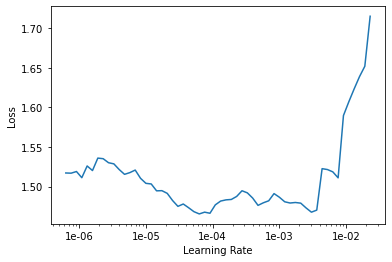

In [83]:
learn.recorder.plot()

In [92]:
learn.load('stage-4')
lrs = slice(5e-04, 2e-03)
learn.fit_one_cycle(10, lrs)

epoch,train_loss,valid_loss,acc_camvid,time
0,1.410730,1.281373,0.700771,00:01
1,1.368112,1.203255,0.692404,00:01
2,1.291596,0.983241,0.741455,00:01
3,1.248799,0.966127,0.759148,00:01
4,1.182936,0.953036,0.757243,00:01
5,1.117803,0.868961,0.780703,00:01
6,1.049875,0.766696,0.825124,00:01
7,0.981403,0.758385,0.823997,00:01
8,0.925077,0.736312,0.827519,00:01
9,0.878106,0.720648,0.832223,00:01


In [0]:
learn.save('stage-5')

In [94]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


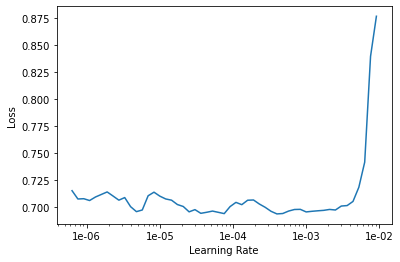

In [95]:
learn.recorder.plot()

In [97]:
learn.load('stage-5')
lrs = slice(2e-5, (2e-03)/5)
learn.fit_one_cycle(10, lrs)

epoch,train_loss,valid_loss,acc_camvid,time
0,0.722715,0.711866,0.835342,00:01
1,0.710608,0.708482,0.835067,00:01
2,0.703576,0.687924,0.838041,00:01
3,0.694109,0.710619,0.831772,00:01
4,0.692475,0.692579,0.836469,00:01
5,0.684830,0.665107,0.844394,00:01
6,0.673694,0.674543,0.840869,00:01
7,0.666303,0.664273,0.841770,00:01
8,0.658979,0.656540,0.844487,00:01
9,0.648936,0.657604,0.844524,00:01


In [0]:
learn.save('stage-6')

In [100]:
learn.load('stage-6')

Learner(data=ImageDataBunch;

Train: LabelList (80 items)
x: SegmentationItemList
Image (3, 96, 96),Image (3, 96, 96),Image (3, 96, 96),Image (3, 96, 96),Image (3, 96, 96)
y: SegmentationLabelList
ImageSegment (1, 96, 96),ImageSegment (1, 96, 96),ImageSegment (1, 96, 96),ImageSegment (1, 96, 96),ImageSegment (1, 96, 96)
Path: /root/.fastai/data/camvid_tiny/images;

Valid: LabelList (20 items)
x: SegmentationItemList
Image (3, 96, 96),Image (3, 96, 96),Image (3, 96, 96),Image (3, 96, 96),Image (3, 96, 96)
y: SegmentationLabelList
ImageSegment (1, 96, 96),ImageSegment (1, 96, 96),ImageSegment (1, 96, 96),ImageSegment (1, 96, 96),ImageSegment (1, 96, 96)
Path: /root/.fastai/data/camvid_tiny/images;

Test: None, model=DynamicUnet(
  (layers): ModuleList(
    (0): Sequential(
      (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace=True)
      (3)

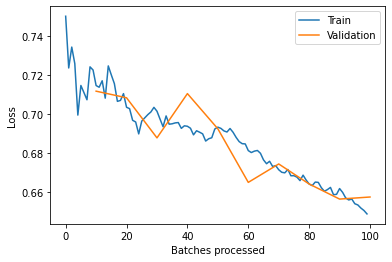

In [101]:
learn.recorder.plot_losses()

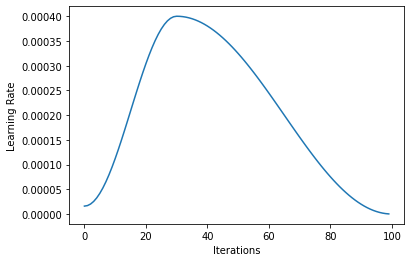

In [102]:
learn.recorder.plot_lr()